# Mean Shift Clustering

In [2]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

#### Data is made with scikit's make_blobs generator.

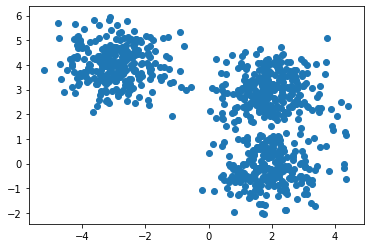

In [75]:
data, _ = make_blobs(n_samples=800, centers=[[2,0], [-3,4], [2,3]], cluster_std=0.8)
plt.scatter(data[:,0], data[:,1])
plt.show()

#### Fitting the data with Meanshift and using scikit's estimate_bandwidth.
##### MeanShift bin seeding
Starting kernel locations are gridded across the data instead of set for every point, ensuring the algorithm is faster because it has to initialise fewer seeds.


In [83]:
import time
start_time = time.time()

# Bandwidth will be higher the further data is spread
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)

model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(data)

print(model, end="\n\n")

print("--- Runtime {:0.2f} milliseconds ---".format((time.time() - start_time)*1000))

MeanShift(bandwidth=1.5184531269024046, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

--- Runtime 183.54 milliseconds ---


In [90]:
clusterCenters = model.cluster_centers_
numClusters = len(clusterCenters)

print("number of estimated clusters : %d" % numClusters)

3
number of estimated clusters : 3
